In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install gdown

In [3]:
import gdown

In [4]:
url="https://drive.google.com/uc?id=1dTNPQpf1fhnURzLIyXGeEmzgktsc4kgP"
output="autos_data.csv"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1dTNPQpf1fhnURzLIyXGeEmzgktsc4kgP
To: /kaggle/working/autos_data.csv
100%|██████████| 68.4M/68.4M [00:00<00:00, 140MB/s] 


'autos_data.csv'

In [5]:
import pandas as pd

# Load the dataset with a specified encoding
df = pd.read_csv("autos_data.csv", encoding="ISO-8859-1")

# Display the first 5 rows of the dataset
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [6]:
df.shape

(371528, 20)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [8]:
df = df.drop(columns=['dateCrawled','lastSeen', 'dateCreated', 'notRepairedDamage', 'nrOfPictures','postalCode','abtest','offerType' ])

In [9]:
df.shape

(371528, 12)

In [10]:
df = df.drop(columns=['seller'])

In [11]:
df.isnull().sum()

name                       0
price                      0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
dtype: int64

In [12]:
# Drop rows with any missing values
df_cleaned = df.dropna()

# Check the shape of the cleaned dataset
print(df_cleaned.shape)

(299864, 11)


In [13]:
df_cleaned

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manuell,102,3er,150000,10,benzin,bmw
6,Peugeot_206_CC_110_Platinum,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot
...,...,...,...,...,...,...,...,...,...,...,...
371521,Opel_Zafira_1.6_Elegance_TÜV_12/16,1150,bus,2000,manuell,0,zafira,150000,3,benzin,opel
371524,Smart_smart_leistungssteigerung_100ps,1199,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen
371526,VW_Golf_Kombi_1_9l_TDI,3400,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen


In [14]:
# Reset the index of the cleaned DataFrame
df_cleaned = df_cleaned.reset_index(drop=True)

# Verify the reset
print(df_cleaned.head())  # Optional: to check the new index


                                                name  price vehicleType  \
0                     Jeep_Grand_Cherokee_"Overland"   9800         suv   
1                                 GOLF_4_1_4__3TÜRER   1500  kleinwagen   
2                     Skoda_Fabia_1.4_TDI_PD_Classic   3600  kleinwagen   
3  BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...    650   limousine   
4                        Peugeot_206_CC_110_Platinum   2200      cabrio   

   yearOfRegistration    gearbox  powerPS    model  kilometer  \
0                2004  automatik      163    grand     125000   
1                2001    manuell       75     golf     150000   
2                2008    manuell       69    fabia      90000   
3                1995    manuell      102      3er     150000   
4                2004    manuell      109  2_reihe     150000   

   monthOfRegistration fuelType       brand  
0                    8   diesel        jeep  
1                    6   benzin  volkswagen  
2                   

In [15]:
df_cleaned = df_cleaned.drop(columns=['name'])

In [16]:
df_cleaned

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand
0,9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep
1,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen
2,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda
3,650,limousine,1995,manuell,102,3er,150000,10,benzin,bmw
4,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot
...,...,...,...,...,...,...,...,...,...,...
299859,1150,bus,2000,manuell,0,zafira,150000,3,benzin,opel
299860,1199,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart
299861,9200,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen
299862,3400,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen


In [17]:
# Check for zero values in the DataFrame
zero_values = (df_cleaned == 0).sum()

# Display columns with zero values
print(zero_values)

price                   5044
vehicleType                0
yearOfRegistration         0
gearbox                    0
powerPS                16321
model                      0
kilometer                  0
monthOfRegistration    14142
fuelType                   0
brand                      0
dtype: int64


In [18]:
# Remove rows with zero values in critical columns (powerPS, monthOfRegistration, price)
df_cleaned = df_cleaned[df_cleaned['powerPS'] > 0]
df_cleaned = df_cleaned[df_cleaned['monthOfRegistration'] > 0]
df_cleaned = df_cleaned[df_cleaned['price'] > 0]

# Verify the new DataFrame shape
print(df_cleaned.shape)

(269217, 10)


In [19]:
df_cleaned

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand
0,9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep
1,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen
2,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda
3,650,limousine,1995,manuell,102,3er,150000,10,benzin,bmw
4,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot
...,...,...,...,...,...,...,...,...,...,...
299858,3200,limousine,2004,manuell,225,leon,150000,5,benzin,seat
299860,1199,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart
299861,9200,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen
299862,3400,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen


In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
# Shuffle the dataset and select 2000 random rows
df_shuffled = df_cleaned.sample(frac=1, random_state=42)  # Shuffle with fixed random state
df_sampled = df_shuffled.iloc[:2000]  # Select first 2000 rows after shuffling

print(f"Dataset size after sampling: {df_sampled.shape}")
df_sampled.head()


Dataset size after sampling: (2000, 10)


,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand
218052,4900,bus,2000,manuell,116,transporter,150000,10,benzin,volkswagen
279064,300,limousine,1992,automatik,75,golf,150000,4,benzin,volkswagen
230841,1150,limousine,1999,automatik,125,c_klasse,150000,7,diesel,mercedes_benz
191877,1000,kleinwagen,2001,manuell,60,punto,150000,5,benzin,fiat
289543,1800,limousine,2001,manuell,125,mondeo,150000,8,benzin,ford


In [22]:
# Separate features (X) and target (y)
X = df_sampled.drop(columns=["price"])  # Features
y = df_sampled["price"]  # Target

# One-Hot Encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into 90% training and 10% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (1800, 248)
Test data shape: (200, 248)


In [23]:
# Initialize SVR model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

# K-Fold Cross-Validation on the training set
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(svr_model, X_train, y_train, cv=kf, scoring='r2')

print("Cross-validation R2 scores:", cv_scores)
print("Mean R2 score from CV:", np.mean(cv_scores))


Cross-validation R2 scores: [-0.0609715  -0.05828386 -0.06890414 -0.02128062 -0.09330226]
Mean R2 score from CV: -0.06054847347315233


In [24]:
# Train the SVR model on the training data
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test)

print("Model training complete.")


Model training complete.


Mean Squared Error (MSE): 301745547.05120206
Mean Absolute Error (MAE): 5667.4543142610555
R2 Score: -0.03913833135831801


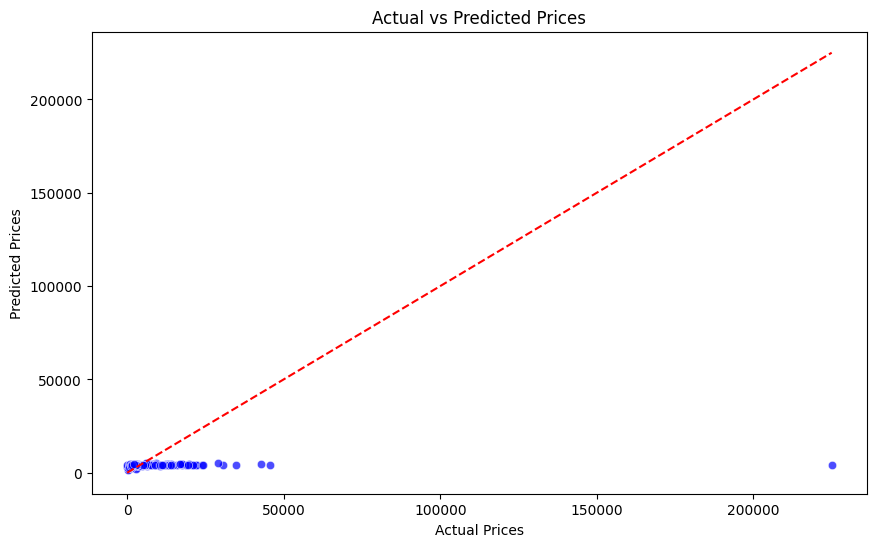

In [25]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R2 Score: {r2}")

# Plot the actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


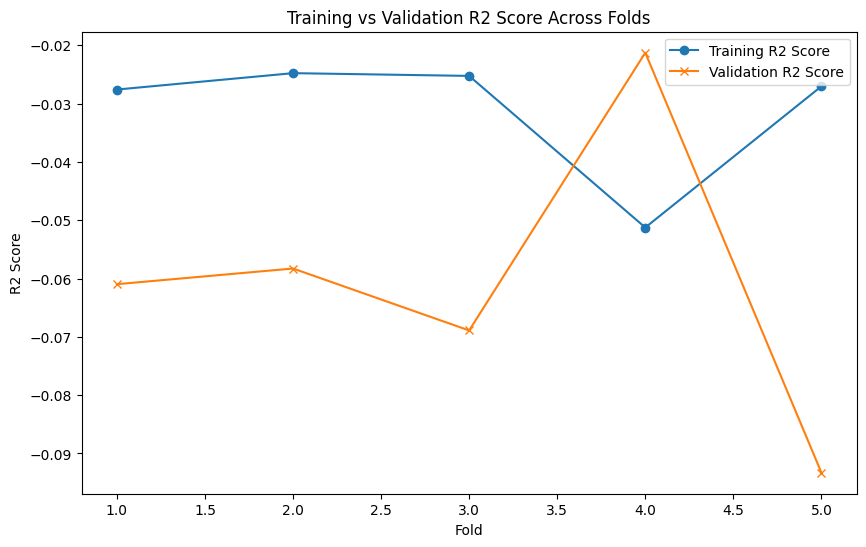

In [26]:
# Perform training and validation R2 score calculation across folds
train_scores = []
val_scores = []

for train_idx, val_idx in kf.split(X_train):
    X_t, X_v = X_train[train_idx], X_train[val_idx]
    y_t, y_v = y_train.iloc[train_idx], y_train.iloc[val_idx]

    svr_model.fit(X_t, y_t)
    train_scores.append(svr_model.score(X_t, y_t))
    val_scores.append(svr_model.score(X_v, y_v))

# Plot training and validation R2 scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_scores) + 1), train_scores, label='Training R2 Score', marker='o')
plt.plot(range(1, len(val_scores) + 1), val_scores, label='Validation R2 Score', marker='x')
plt.xlabel("Fold")
plt.ylabel("R2 Score")
plt.title("Training vs Validation R2 Score Across Folds")
plt.legend()
plt.show()


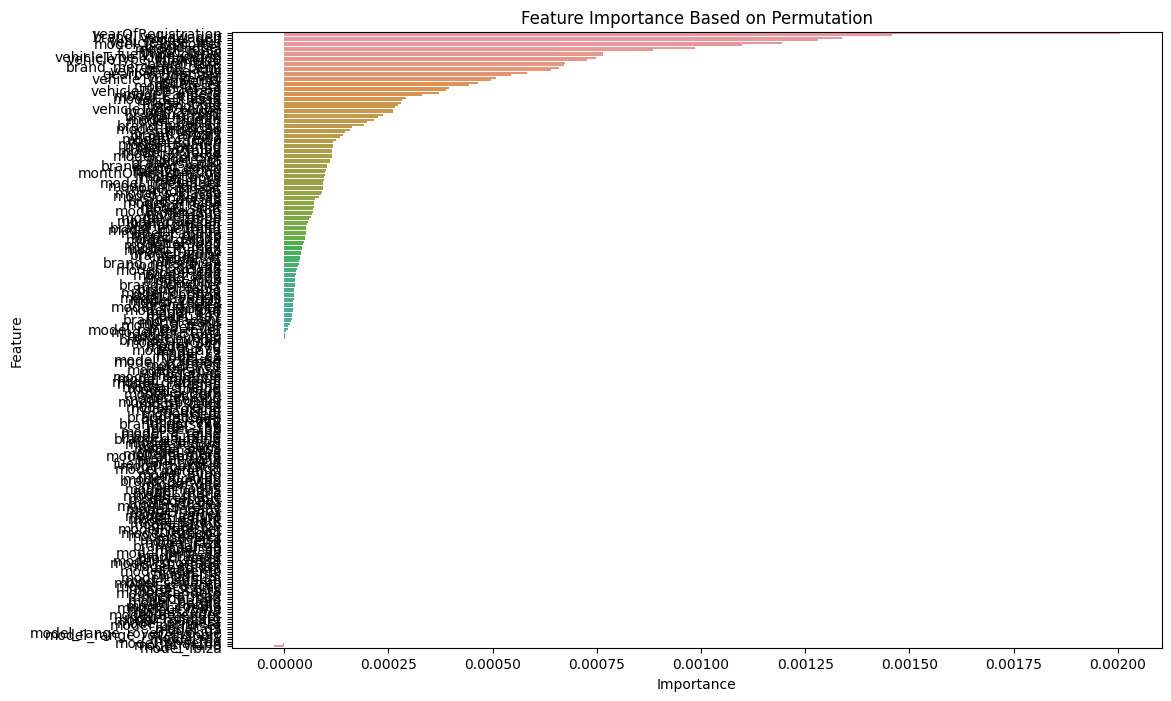

In [27]:
from sklearn.inspection import permutation_importance

# Perform permutation importance
perm_importance = permutation_importance(svr_model, X_test, y_test, n_repeats=10, random_state=42)

# Visualize the feature importance
importance_df = pd.DataFrame({"Feature": X.columns, "Importance": perm_importance.importances_mean})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance Based on Permutation")
plt.show()


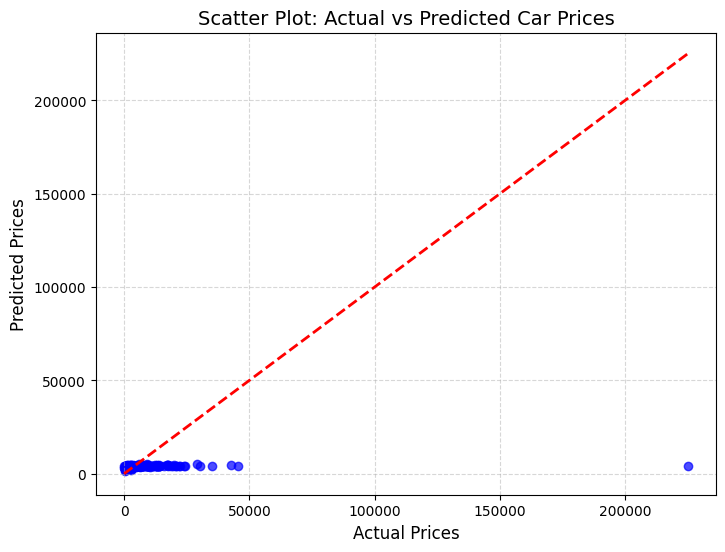

In [28]:
import matplotlib.pyplot as plt

# Assuming `y_test` contains the actual values and `y_pred` contains the predicted values

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)  # Diagonal line
plt.title('Scatter Plot: Actual vs Predicted Car Prices', fontsize=14)
plt.xlabel('Actual Prices', fontsize=12)
plt.ylabel('Predicted Prices', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
